In [ ]:
! pip install -r requirements.txt

# Importando librerias

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importando datos

In [23]:
'''
Cuando comencé a trabajar con el archivo 'dataset_SCL.csv' proporcionado y evidencié que
algunas lineas contenían el caracter ", sencillo o triple. Esto crea un error en esas lineas
al ser leido como pandas.DataFrame. Por ejemplo, las lineas 17.059 y 17.060 vienen con ese
problema.

Decidí elimnar esas lineas, en la lectura de los datos usando, el comment='"'.
El archivo original tiene 68.206 y quedó con 68.167.
Se eliminaron solamente 39 lineas, un tamaño infimo de datos para el tamaño original.

Usé dtype='object' porque siendo un desafio de clasificación, y dando una ojeada inicial 
a los datos, establezco que son pocos los tipos de datos diferentes a object.

Serian datetime solamente 'Fecha-I' y 'Fecha-O'.
Serian solamente int 'DIA', 'MES' y 'AÑO'
'''

df_initial = pd.read_csv('dataset_SCL.csv', dtype='object', comment='"', encoding='utf-8')
df_initial.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [25]:
# Comprobando que todas las columnas quedaron tipo object
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68167 entries, 0 to 68166
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68167 non-null  object
 1   Vlo-I      68167 non-null  object
 2   Ori-I      68167 non-null  object
 3   Des-I      68167 non-null  object
 4   Emp-I      68167 non-null  object
 5   Fecha-O    68167 non-null  object
 6   Vlo-O      68166 non-null  object
 7   Ori-O      68167 non-null  object
 8   Des-O      68167 non-null  object
 9   Emp-O      68167 non-null  object
 10  DIA        68167 non-null  object
 11  MES        68167 non-null  object
 12  AÑO        68167 non-null  object
 13  DIANOM     68167 non-null  object
 14  TIPOVUELO  68167 non-null  object
 15  OPERA      68167 non-null  object
 16  SIGLAORI   68167 non-null  object
 17  SIGLADES   68167 non-null  object
dtypes: object(18)
memory usage: 9.4+ MB


# Preparación y limpieza de los datos

## Arreglando problemas de tipo de datos

### Fechas

In [26]:
# Transformando 'fechas' a datetime
df_initial['Fecha-I'] =  pd.to_datetime(df_initial['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df_initial['Fecha-O'] =  pd.to_datetime(df_initial['Fecha-O'], format='%Y-%m-%d %H:%M:%S')
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68167 entries, 0 to 68166
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68167 non-null  datetime64[ns]
 1   Vlo-I      68167 non-null  object        
 2   Ori-I      68167 non-null  object        
 3   Des-I      68167 non-null  object        
 4   Emp-I      68167 non-null  object        
 5   Fecha-O    68167 non-null  datetime64[ns]
 6   Vlo-O      68166 non-null  object        
 7   Ori-O      68167 non-null  object        
 8   Des-O      68167 non-null  object        
 9   Emp-O      68167 non-null  object        
 10  DIA        68167 non-null  object        
 11  MES        68167 non-null  object        
 12  AÑO        68167 non-null  object        
 13  DIANOM     68167 non-null  object        
 14  TIPOVUELO  68167 non-null  object        
 15  OPERA      68167 non-null  object        
 16  SIGLAORI   68167 non-null  object       

### Enteros

In [27]:
# Transformando 'DIA', 'MES' y 'AÑO', para tipo int
df_initial = df_initial.astype({'DIA': 'int32', 'MES': 'int32', 'AÑO': 'int32'})
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68167 entries, 0 to 68166
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68167 non-null  datetime64[ns]
 1   Vlo-I      68167 non-null  object        
 2   Ori-I      68167 non-null  object        
 3   Des-I      68167 non-null  object        
 4   Emp-I      68167 non-null  object        
 5   Fecha-O    68167 non-null  datetime64[ns]
 6   Vlo-O      68166 non-null  object        
 7   Ori-O      68167 non-null  object        
 8   Des-O      68167 non-null  object        
 9   Emp-O      68167 non-null  object        
 10  DIA        68167 non-null  int32         
 11  MES        68167 non-null  int32         
 12  AÑO        68167 non-null  int32         
 13  DIANOM     68167 non-null  object        
 14  TIPOVUELO  68167 non-null  object        
 15  OPERA      68167 non-null  object        
 16  SIGLAORI   68167 non-null  object       

## Valores nulos

In [28]:
# Valores nulos?
df_initial.isnull().sum().sum()

1

In [29]:
# Fila del valor nulo?
row_nan = df_initial[df_initial.isnull().any(1)]
row_nan 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


El valor nan está en la columna 'Vlo-O'.

In [31]:
# Colocaré el mismo valor de 'Vlo-I'
df_initial.loc[6068,'Vlo-O']='200'

In [32]:
# Rectificando valores nulos?
df_initial.isnull().sum().sum()

# No hay valores nulos

0

## Datos duplicados

In [33]:
# Existen datos duplicados?
df_initial.duplicated().any()

# No hay valores duplicados

False

## Concordancia de la información

### Cantidad de valores unicos

La información contenida tiene concordar con lo que significa.

Por ejemplo, encontrar una ciudad en tipo de vuelo, seria un problema de concordancia.

In [34]:
# Para esto calculó la cantidad de datos unicos por columna
df_initial.nunique()

Fecha-I      53232
Vlo-I          581
Ori-I            1
Des-I           61
Emp-I           30
Fecha-O      62742
Vlo-O          857
Ori-O            1
Des-O           60
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        59
dtype: int64

Tres columnas tienen valores unicos y se pueden eliminar.

Estas tres columnas se refieren al origen de los vuelos.

Todos los vuelos se originan desde Santiago.

In [35]:
df_initial.drop(['Ori-I', 'Ori-O', 'SIGLAORI'], axis=1, inplace=True)

### AÑO

Hay dos valores en 'AÑO', pero parece que las 'fechas' son solo de 2017

In [36]:
# Comprobar los años de las fechas
df_initial['AÑO'].value_counts()

2017    68165
2018        2
Name: AÑO, dtype: int64

Hay solo dos fechas con 'AÑO' de 2018

In [37]:
# Se puede comprobar manualmente
row_2018 = df_initial[df_initial['AÑO'] == 2018]
row_2018 

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES
66891,2017-12-31 23:55:00,602,KLAX,LAN,2018-01-01 00:02:00,602.0,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Los Angeles
66920,2017-12-31 23:40:00,622,MMMX,LAN,2018-01-01 00:12:00,622.0,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Ciudad de Mexico


Realmente corresponde a dos vuelos que operaron en 2018. Pero, por la poca variabilidad de los datos de 'AÑO', esta columna se puede elimnar

In [38]:
df_initial.drop(['AÑO'], axis=1, inplace=True)

### Concordancia de fechas

In [96]:
# 'DIA' está bien
df_initial['DIA'].unique()

array([ 1,  2,  3,  4,  5,  7,  8, 10, 12, 14, 16, 18, 21, 23, 25, 28, 30,
        6,  9, 11, 13, 15, 17, 19, 22, 24, 26, 27, 29, 31, 20],
      dtype=int32)

In [97]:
# 'MES' está bien
df_initial['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [98]:
# 'DIANOM' está bien
df_initial['DIANOM'].unique()

array(['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Sabado',
       'Viernes'], dtype=object)

### Codigo aerolinea

Se presumió, inicialmente, que 'Emp-I', 'Emp-O' y 'OPERA' se refirieran a la misma aerolinea, pero el numero de valores unicos parece indicar lo contrario.

In [101]:
# ¿En cuántas filas son diferentes?
df_initial[df_initial['Emp-I'] != df_initial['Emp-O']]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
345,2017-01-21 22:30:00,2291,SABE,AUT,2017-01-21 22:28:00,2291,SABE,ARG,21,1,Sabado,I,Austral,Buenos Aires
814,2017-01-01 07:14:00,624,SPJC,AVA,2017-01-01 07:11:00,624,SPJC,LRC,1,1,Domingo,I,Avianca,Lima
815,2017-01-02 07:00:00,624,SPJC,AVA,2017-01-02 07:05:00,624,SPJC,LRC,2,1,Lunes,I,Avianca,Lima
816,2017-01-03 07:14:00,624,SPJC,AVA,2017-01-03 07:14:00,624,SPJC,LRC,3,1,Martes,I,Avianca,Lima
817,2017-01-04 07:00:00,624,SPJC,AVA,2017-01-04 07:24:00,624,SPJC,LRC,4,1,Miercoles,I,Avianca,Lima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,2017-12-26 16:30:00,1033,SCIE,LAW,2017-12-26 16:34:00,33,SCIE,JMR,26,12,Martes,N,Latin American Wings,Concepcion
67839,2017-12-27 16:30:00,1033,SCIE,LAW,2017-12-27 16:30:00,33,SCIE,JMR,27,12,Miercoles,N,Latin American Wings,Concepcion
67840,2017-12-28 16:30:00,1033,SCIE,LAW,2017-12-28 16:29:00,33,SCIE,JMR,28,12,Jueves,N,Latin American Wings,Concepcion
67841,2017-12-29 16:30:00,1033,SCIE,LAW,2017-12-29 16:49:00,33,SCIE,JMR,29,12,Viernes,N,Latin American Wings,Concepcion


En más de 18.000 vuelos la aerolinea programada fue diferente a la aerolinea que finalmente operó el vuelo. Si hay una relación directa entre estos vuelos y el retraso, esta podria ser **una variable muy importante** para los modelos.

**Voy a definir más adelante una columna con valores 1 para los vuelos donde hubo cambio de aerolinea y valores 0 donde no hubo ese cambio.**

### Codigo de vuelo

#### Codigos de vuelos con decimales

In [56]:
df_initial['Vlo-O'].unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

In [57]:
df_initial['Vlo-I'].unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

Se pudo observar que algunos valores de 'Vlo-O' tienen numeros almacenados con decimales (.0). Por esto 'Vlo-O' tiene 857 valores unicos y 'Vlo-I' tiene solo 581 valores unicos

In [58]:
# Remplazar '.0' en 'Vlo-O'
df_initial['Vlo-O'] = df_initial['Vlo-O'].str.replace('.0','')
df_initial.nunique()

Fecha-I      53232
Vlo-I          581
Des-I           61
Emp-I           30
Fecha-O      62742
Vlo-O          444
Des-O           60
Emp-O           32
DIA             31
MES             12
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLADES        59
dtype: int64

'Vlo-O' pasó de 857 valores unicos a 444

In [66]:
# Problemas de los decimales solucionado
df_initial['Vlo-O'].unique()

array(['226', '912', '9', '92', '93', '1', '11', '1281', '1283', '1285',
       '1287', '1289', '1291', '2291', '98', '116', '176', '2', '295',
       '689', '112', '118', '174', '249', '276', '495', '4495', '146',
       '7661', '7663', '9245', '9268', '9362', '68', '624', '28', '846',
       '741', '21', '23', '27', '29', '69', '73', '75', '99', '8125',
       '8137', '81', '8161', '91', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '3', '7', '13', '15', '17', '25', '41', '43', '51',
       '53', '55', '61', '71', '83', '4', '6', '8', '122', '128', '132',
       '134', '142', '156', '162', '164', '166', '172', '182', '184',
       '186', '188', '192', '194', '196', '521', '531', '551', '0', '14',
       '31', '35', '37', '57', '65', '67', '89', '97', '114', '124',
       '126', '136', '138', '144', '148', '152', '154', '168', '178',
       '211', '213', '215', '217', '219', '221', '231', '233', '235',
       '237', '239', '241', '247', '251', '257', '259', '261', '26

#### Cambio codigo de vuelo entre programado y operado

Similar al cambio de codigo de aerolinea entre los vuelos programados y operados. Existe un cambio ente el codigo de vuelo programado y operado.

In [108]:
# ¿En cuántas filas son diferentes el codigo de vuelo programado con el operado?
df_initial[df_initial['Vlo-I'] != df_initial['Vlo-O']]

,Fecha-I,Vlo-I,Emp-I,Fecha-O,Vlo-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
48,2017-01-01 22:30:00,940,AAL,2017-01-01 22:31:00,9,AAL,1,1,Domingo,I,American Airlines,Dallas
49,2017-01-02 22:30:00,940,AAL,2017-01-02 22:26:00,9,AAL,2,1,Lunes,I,American Airlines,Dallas
50,2017-01-03 22:30:00,940,AAL,2017-01-03 22:40:00,9,AAL,3,1,Martes,I,American Airlines,Dallas
51,2017-01-04 22:30:00,940,AAL,2017-01-04 22:50:00,9,AAL,4,1,Miercoles,I,American Airlines,Dallas
52,2017-01-05 22:30:00,940,AAL,2017-01-05 22:41:00,9,AAL,5,1,Jueves,I,American Airlines,Dallas
...,...,...,...,...,...,...,...,...,...,...,...,...
68162,2017-12-22 14:55:00,400,JAT,2017-12-22 15:41:00,0,JAT,22,12,Viernes,I,JetSmart SPA,Lima
68163,2017-12-25 14:55:00,400,JAT,2017-12-25 15:11:00,0,JAT,25,12,Lunes,I,JetSmart SPA,Lima
68164,2017-12-27 14:55:00,400,JAT,2017-12-27 15:35:00,0,JAT,27,12,Miercoles,I,JetSmart SPA,Lima
68165,2017-12-29 14:55:00,400,JAT,2017-12-29 15:08:00,0,JAT,29,12,Viernes,I,JetSmart SPA,Lima


En 19.721 vuelos hubo un cambio entre el codigo de vuelo programado con el codigo de vuelo operado. Acá podría hacer una relación directa cuando se presentan los retrasos y seria una **variable muy importante**.

**Igual que con el cambio de codigo de aerolinea, voy a definir más adelante una columna con valores 1 para los vuelos donde hubo cambio de codigo de vuelo y valores 0 donde no hubo ese cambio.**

### Ciudad destino

Se presumió, inicialmente, que 'Des-I', 'Des-O' y 'SIGLADES' se refirieran a la misma ciudad, pero el numero de valores unicos parece indicar lo contrario.

In [78]:
# ¿En cuáles filas es diferente?
df_initial[df_initial['Des-I'] != df_initial['Des-O']]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
1397,2017-01-17 19:20:00,25,SCTE,SKU,2017-01-17 19:46:00,25,SCQP,SKU,17,1,Martes,N,Sky Airline,Temuco
7290,2017-02-15 06:25:00,11,SCTE,SKU,2017-02-15 06:25:00,11,SCQP,SKU,15,2,Miercoles,N,Sky Airline,Temuco
7520,2017-02-27 06:40:00,71,SCIE,SKU,2017-02-27 09:07:00,71,SCQP,SKU,27,2,Lunes,N,Sky Airline,Temuco
8456,2017-02-15 06:10:00,57,SCTE,LAN,2017-02-15 06:12:00,57,SCQP,LAN,15,2,Miercoles,N,Grupo LATAM,Temuco
12787,2017-03-18 06:25:00,11,SCTE,SKU,2017-03-18 06:29:00,11,SCQP,SKU,18,3,Sabado,N,Sky Airline,Temuco
12823,2017-03-22 12:50:00,17,SCBA,SKU,2017-03-22 12:48:00,17,SCTE,SKU,22,3,Miercoles,N,Sky Airline,Puerto Montt
16169,2017-03-13 23:20:00,532,KJFK,LAN,2017-03-14 01:35:00,1346,KMIA,LAN,14,3,Martes,I,Grupo LATAM,Miami
16937,2017-03-22 17:00:00,1446,SEGU,LAN,2017-03-22 17:11:00,1361,SABE,LAN,22,3,Miercoles,I,Grupo LATAM,Buenos Aires
18291,2017-04-14 18:40:00,25,SCTE,SKU,2017-04-14 18:48:00,25,SCQP,SKU,14,4,Viernes,N,Sky Airline,Temuco
20442,2017-04-14 22:00:00,289,SCTE,LAN,2017-04-14 22:01:00,289,SCCI,LXP,14,4,Viernes,N,Grupo LATAM,Punta Arenas


Hay 28 vuelos en los que 'Des-I' es diferente de 'Des-O'.

Haciendo una busqueda rapida, parece ser que el codigo **OACI** de 'Des-I' está desactualizado, en algunos casos. En otros casos, hay ciudades que cuentan con mas de un aeropuerto y los vuelos fueron finalmente operados a aeropuertos distintos a los programados, pero en la misma ciudad.

De acuerdo a lo anterior, manejaré **solamente** 'SIGLADES' para los modelos.

#### Eliminar 'Des-I' y 'Des-O'

Pero, como 28 vuelos hacen una poco diferencia sobre los 68.167 vuelos en total. 

Decido no usar estas dos features, porque no tienen la sufiente variacion para aportar al objetivo.

In [102]:
df_initial.drop(['Des-I', 'Des-O'], axis=1, inplace=True)

# PUNTO 1

## ¿Cómo se distribuyen los datos?

In [125]:
# Definicion de variables para graficar
daymonth_flights = df_initial['DIA'].value_counts()
month_flights = df_initial['MES'].value_counts()
weekday_flights = df_initial['DIANOM'].value_counts()
days = [weekday_flights.index[2], weekday_flights.index[5],
        weekday_flights.index[4], weekday_flights.index[1],
        weekday_flights.index[0], weekday_flights.index[6],
        weekday_flights.index[3]
]
values_days = [weekday_flights.values[2], weekday_flights.values[5],
               weekday_flights.values[4], weekday_flights.values[1],
               weekday_flights.values[0], weekday_flights.values[6],
               weekday_flights.values[3]
]


### Distribución 'DIA'

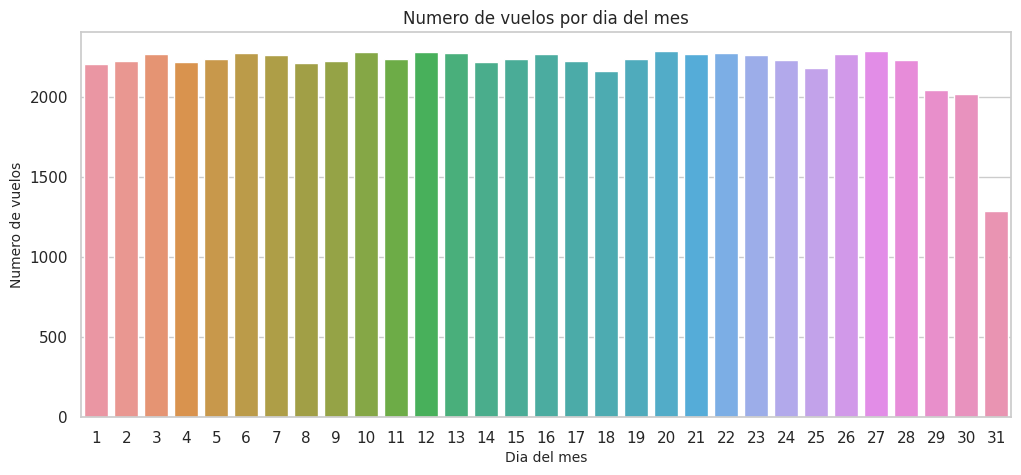

In [121]:
plt.figure(figsize = (12,5))
sns.barplot(x=daymonth_flights.index, y=daymonth_flights.values)
plt.title('Numero de vuelos por dia del mes')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Dia del mes', fontsize=10)
plt.xticks(rotation=0)
plt.show()

### Distribución 'MES'

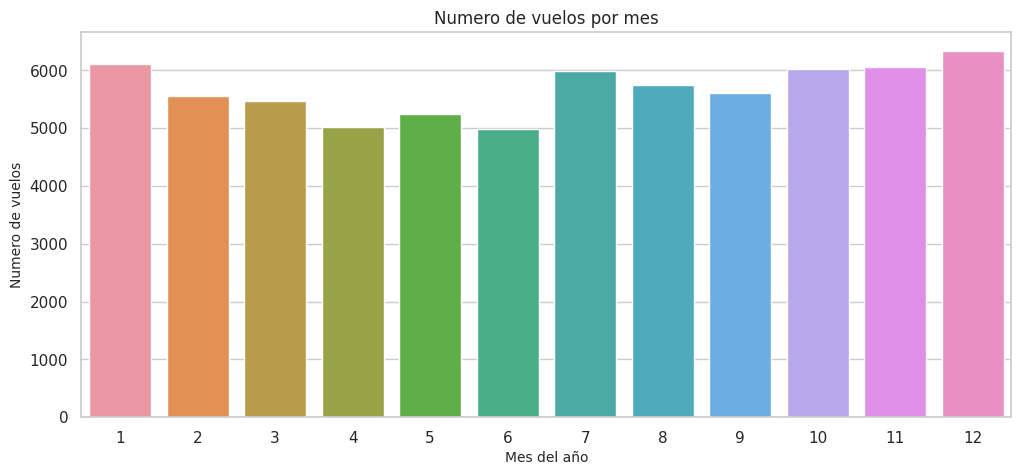

In [124]:
plt.figure(figsize = (12,5))
sns.barplot(x=month_flights.index, y=month_flights.values)
plt.title('Numero de vuelos por mes')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Mes del año', fontsize=10)
plt.xticks(rotation=0)
plt.show()

### Distribución 'DIANOM'

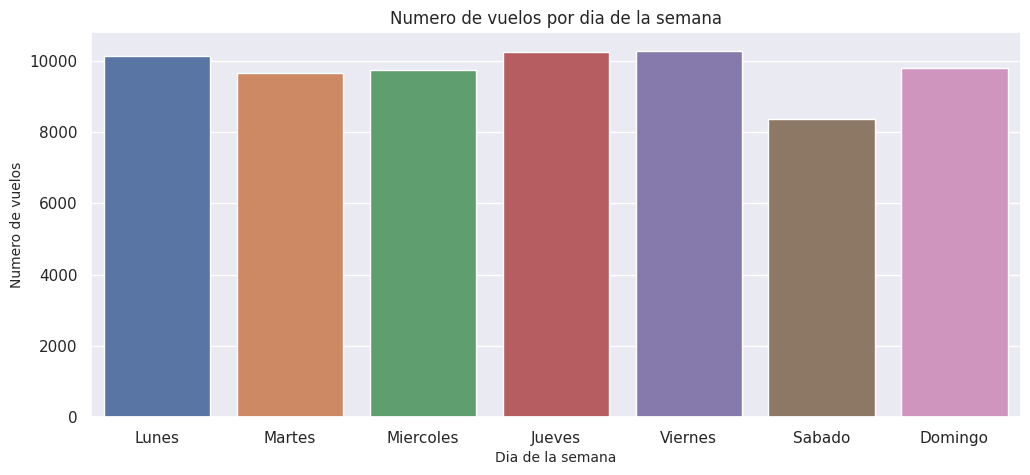

In [127]:
plt.figure(figsize = (12,5))
sns.barplot(x=days, y=values_days)
plt.title('Numero de vuelos por dia de la semana')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Dia de la semana', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [109]:
df_initial

,Fecha-I,Vlo-I,Emp-I,Fecha-O,Vlo-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
0,2017-01-01 23:30:00,226,AAL,2017-01-01 23:33:00,226,AAL,1,1,Domingo,I,American Airlines,Miami
1,2017-01-02 23:30:00,226,AAL,2017-01-02 23:39:00,226,AAL,2,1,Lunes,I,American Airlines,Miami
2,2017-01-03 23:30:00,226,AAL,2017-01-03 23:39:00,226,AAL,3,1,Martes,I,American Airlines,Miami
3,2017-01-04 23:30:00,226,AAL,2017-01-04 23:33:00,226,AAL,4,1,Miercoles,I,American Airlines,Miami
4,2017-01-05 23:30:00,226,AAL,2017-01-05 23:28:00,226,AAL,5,1,Jueves,I,American Airlines,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...
68162,2017-12-22 14:55:00,400,JAT,2017-12-22 15:41:00,0,JAT,22,12,Viernes,I,JetSmart SPA,Lima
68163,2017-12-25 14:55:00,400,JAT,2017-12-25 15:11:00,0,JAT,25,12,Lunes,I,JetSmart SPA,Lima
68164,2017-12-27 14:55:00,400,JAT,2017-12-27 15:35:00,0,JAT,27,12,Miercoles,I,JetSmart SPA,Lima
68165,2017-12-29 14:55:00,400,JAT,2017-12-29 15:08:00,0,JAT,29,12,Viernes,I,JetSmart SPA,Lima


## ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

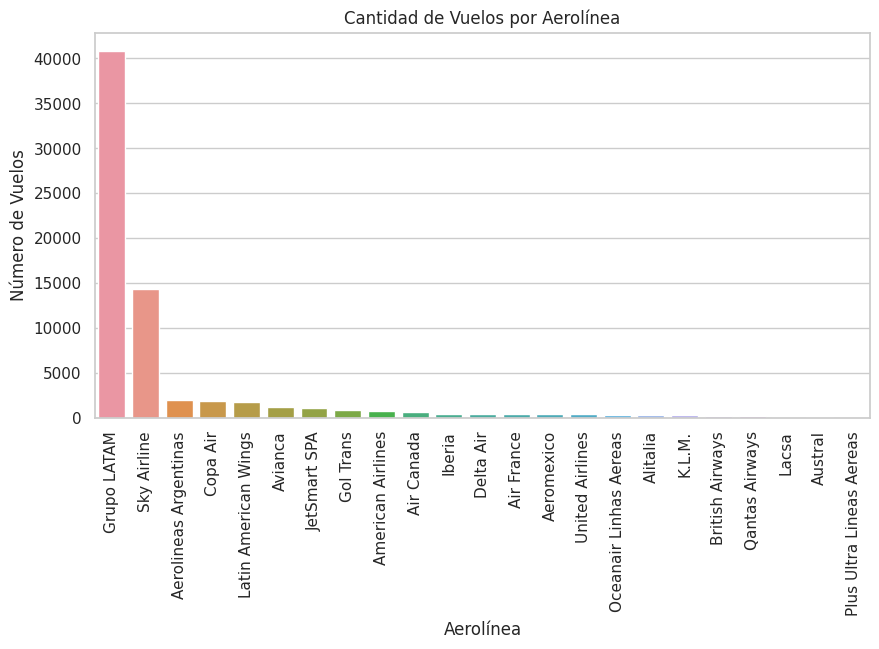

In [107]:
vuelos_aerolineas = df_initial['OPERA'].value_counts()
plt.figure(figsize = (10,5))
# sns.set(style='whitegrid')
sns.barplot(x=vuelos_aerolineas.index, y=vuelos_aerolineas.values)
plt.title('Cantidad de Vuelos por Aerolínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [95]:
vuelos_aerolineas.sum()

68167

Punto 2

**Definir donde hubo cambio y donde no de aerolinea -> feature importante**

**Voy a definir más adelante una columna con valores 1 para los vuelos donde hubo cambio de codigo y valores 0 donde no hubo ese cambio.**


En 19.721 vuelos hubo un cambio entre el codigo de vuelo programado con el codigo de vuelo operado. Acá podría hacer una relación directa cuando se presentan los retrasos y seria una **variable muy importante**.

**Igual que con el cambio de codigo de aerolinea, voy a definir más adelante una columna con valores 1 para los vuelos donde hubo cambio de codigo de vuelo y valores 0 donde no hubo ese cambio.**

In [ ]:
# Adversarial Validation
# roc_auc_score

# Data makes the difference, not the model


: 

: 

: 

: 

: 

In [103]:
df_initial.to_pickle('df_4.pkl')